# DASMatrix 开发测试

> DASMatrix 是一个用于处理DAS数据的高性能、可拓展Python库，主要用于处理DAS数据，并提供可视化功能。

In [1]:
%time
%load_ext autoreload
%autoreload 2  # 自动重载所有模块
import os
import sys

# 添加父目录到 Python 路径，这样就可以导入 DASMatrix 包
sys.path.insert(0, os.path.abspath(".."))

# 现在可以使用正常的导入语句
from DASMatrix import DASProcessor, DASReader, DASVisualizer, SamplingConfig


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 μs


In [2]:
# 正确导入必要的类
from pathlib import Path

# 配置采样参数
sampling_config = SamplingConfig(
    fs=30000,  # 采样频率30kHz
    channels=20,  # 通道数量
    byte_order="big",  # 大端字节序
    wn=0.5,  # 高通滤波截止频率
)

# 创建数据读取器和处理器
data_reader = DASReader(sampling_config)
data_processor = DASProcessor(sampling_config)

# 设置数据文件路径
dat_path = Path(
    "/Users/qianlong/联河光子/Projects/光纤探头测试/20250410-DAS2k/Tantou/silent/2m/CH1_Fs30k_Col20_30s_20250410_DAS2k_Double(1).dat"
)

# 读取原始数据 - 在优化后的API中，target_col是一个可选参数，用于选择特定的列
# output_cols参数在优化后变为target_col
target_cols = list(range(20))  # 从0到20的列 (如果需要0-20这21列)

# 读取原始数据
raw_data = data_reader.ReadRawData(dat_path, target_col=target_cols)

# 使用处理器获取差分和积分数据
diff_data = data_processor.ProcessDifferential(raw_data)
int_data = data_processor.IntegrateData(raw_data)


In [3]:
# 绘制时域波形图
channel_id = 8  # 选择要绘制的通道 ID

# 创建可视化器实例，传入输出路径和采样频率
output_path = Path("output")  # 设置输出路径
sampling_frequency = sampling_config.fs  # 获取采样频率
Visualizer = DASVisualizer(
    output_path=output_path, sampling_frequency=sampling_frequency
)  # 创建可视化器实例


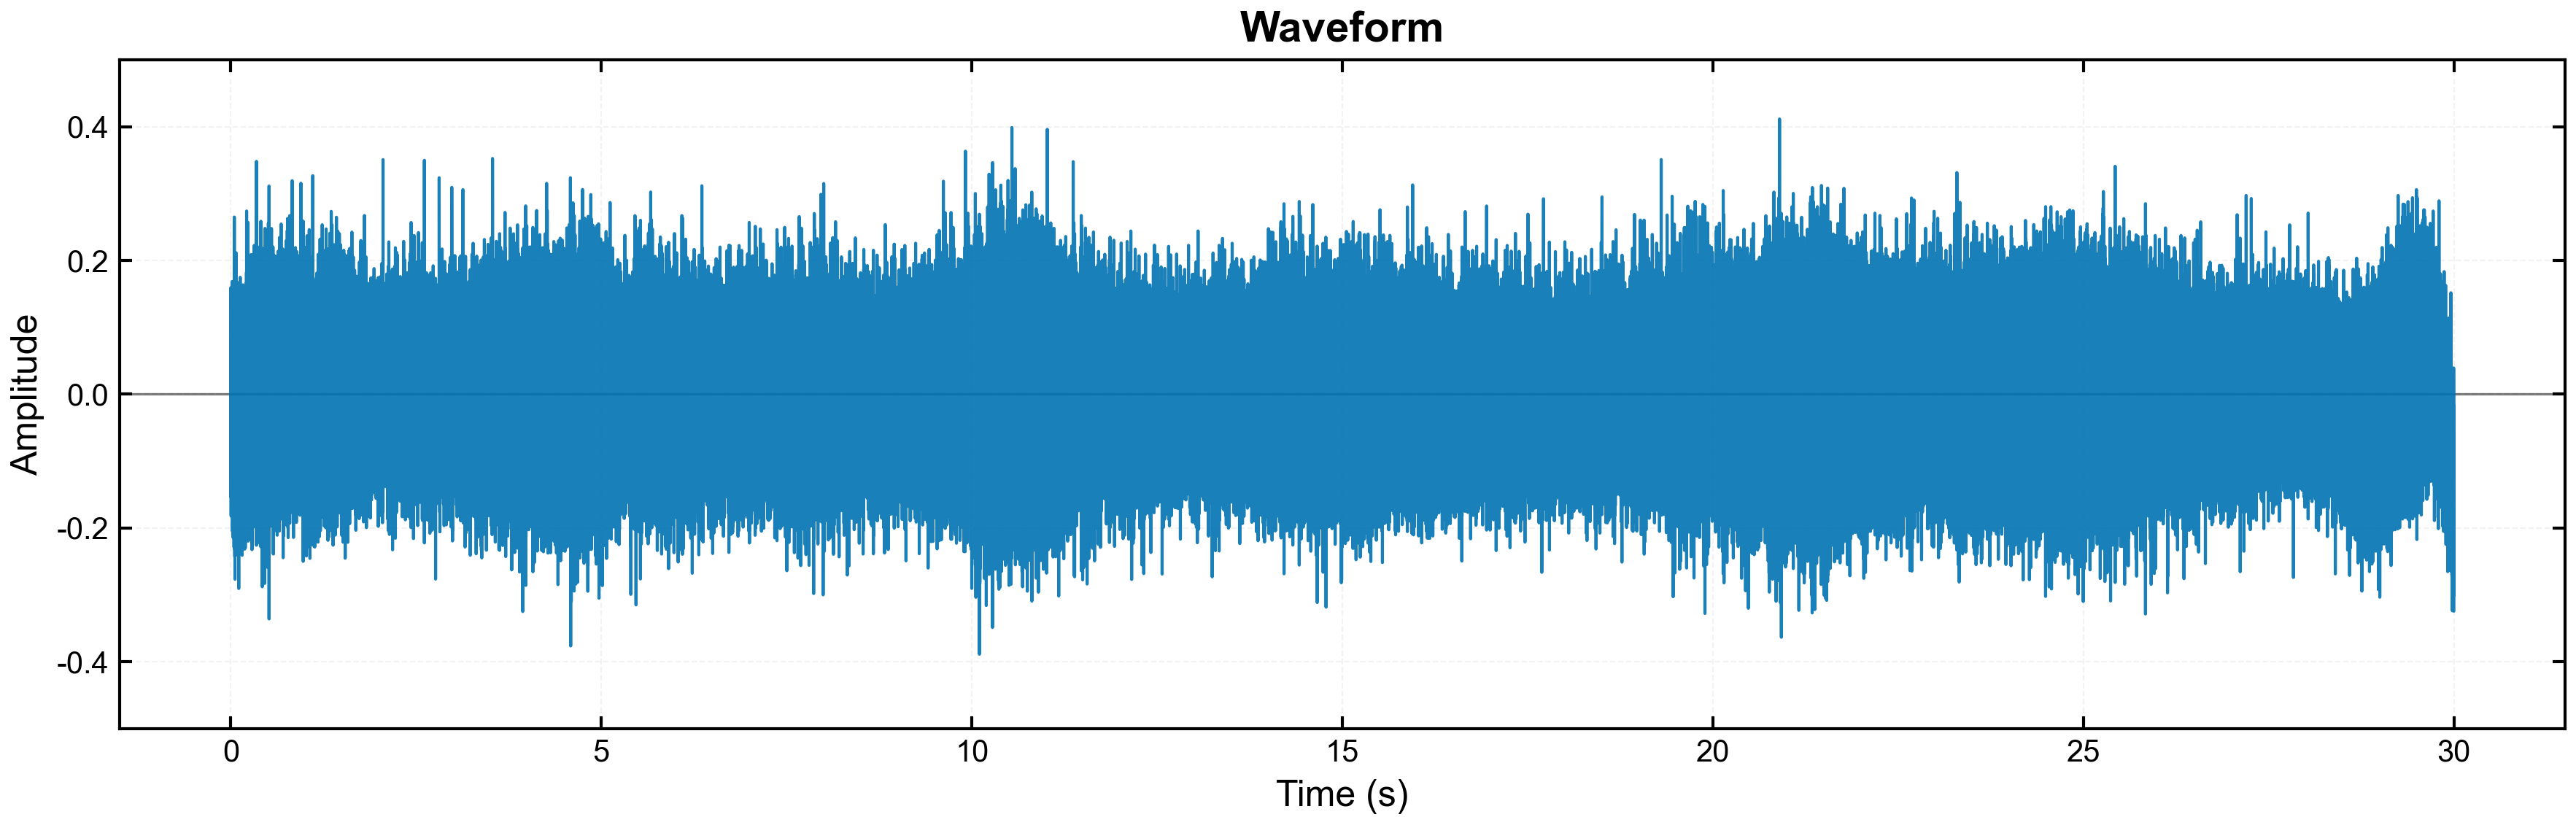

In [4]:
Visualizer.WaveformPlot(
    diff_data[:, channel_id],
    time_range=(0, 30),
    amplitude_range=(-0.5, 0.5),
    file_name="Waveform",
    title="Waveform",
)


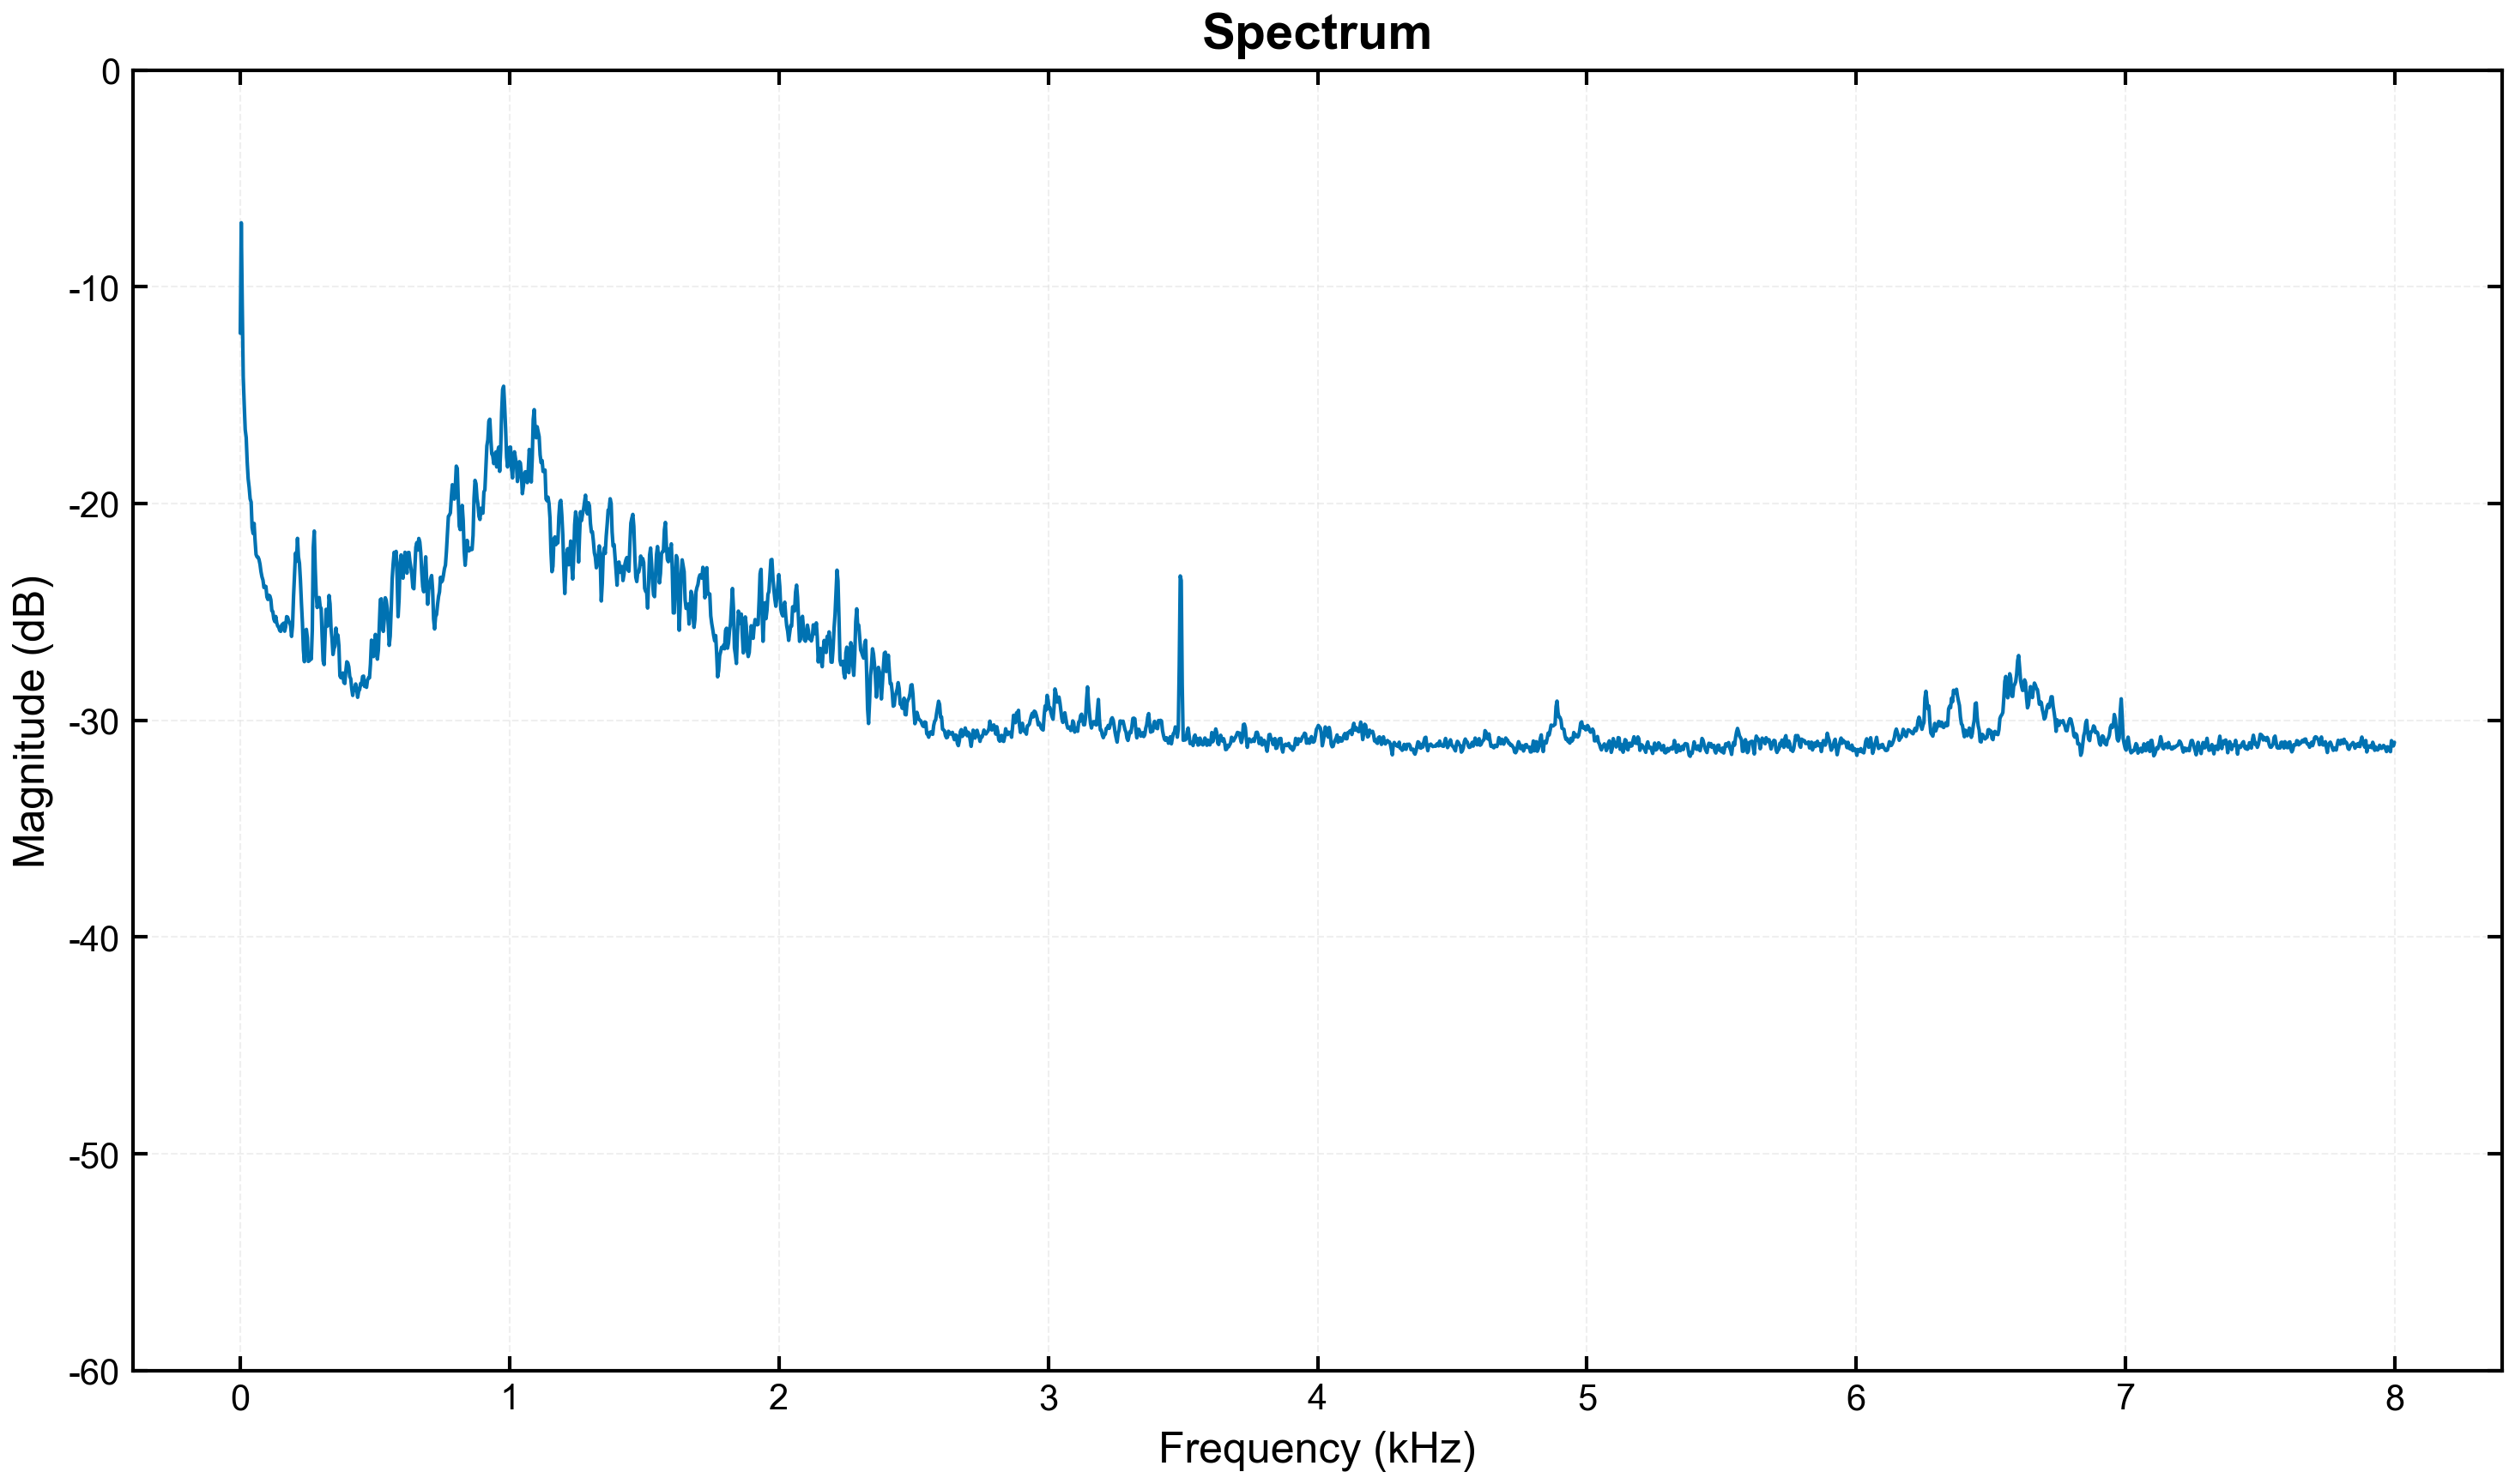

In [5]:
Visualizer.SpectrumPlot(
    data=int_data[:, channel_id],
    file_name="Spectrum",
    title="Spectrum",
    freq_range=(0, 8000),
    db_range=(-60, 0),
)


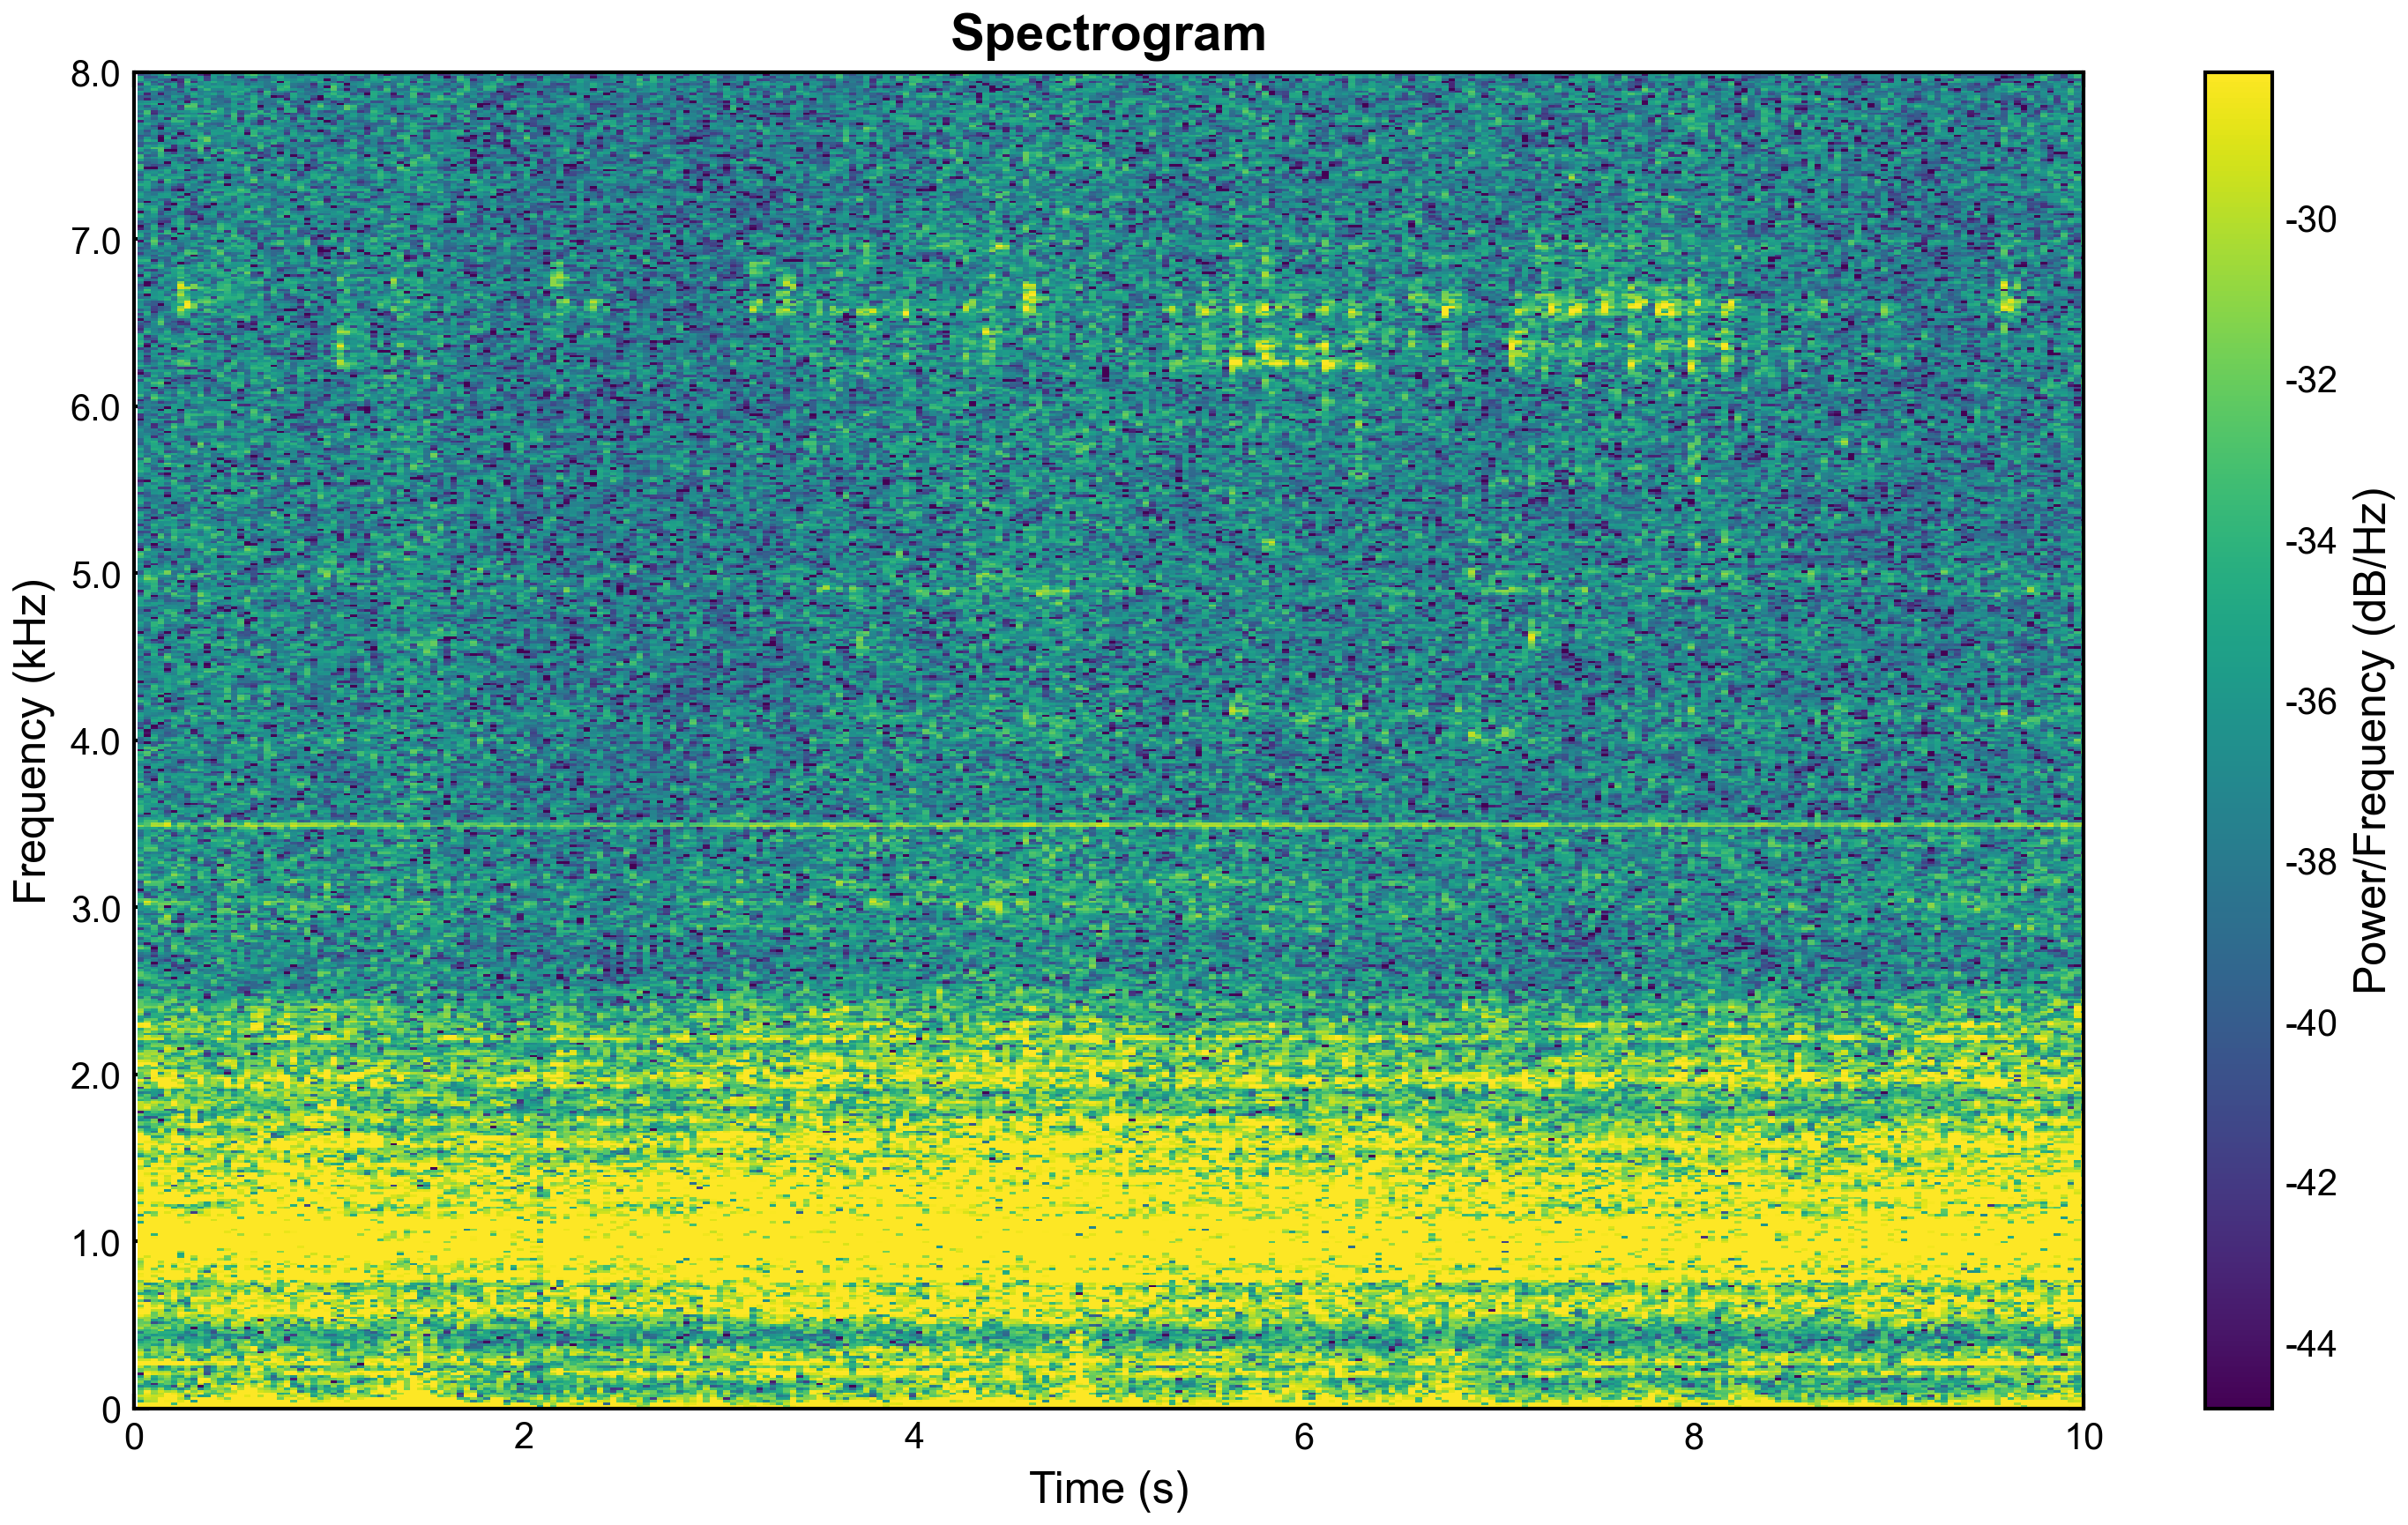

In [6]:
# 对于时频图，直接传入单通道数据而不是整个数据矩阵
Visualizer.SpectrogramPlot(
    data=int_data[:, channel_id],
    time_range=(0, 10),
    freq_range=(0, 8000),
    file_name="Spectrogram",
    title="Spectrogram",
)


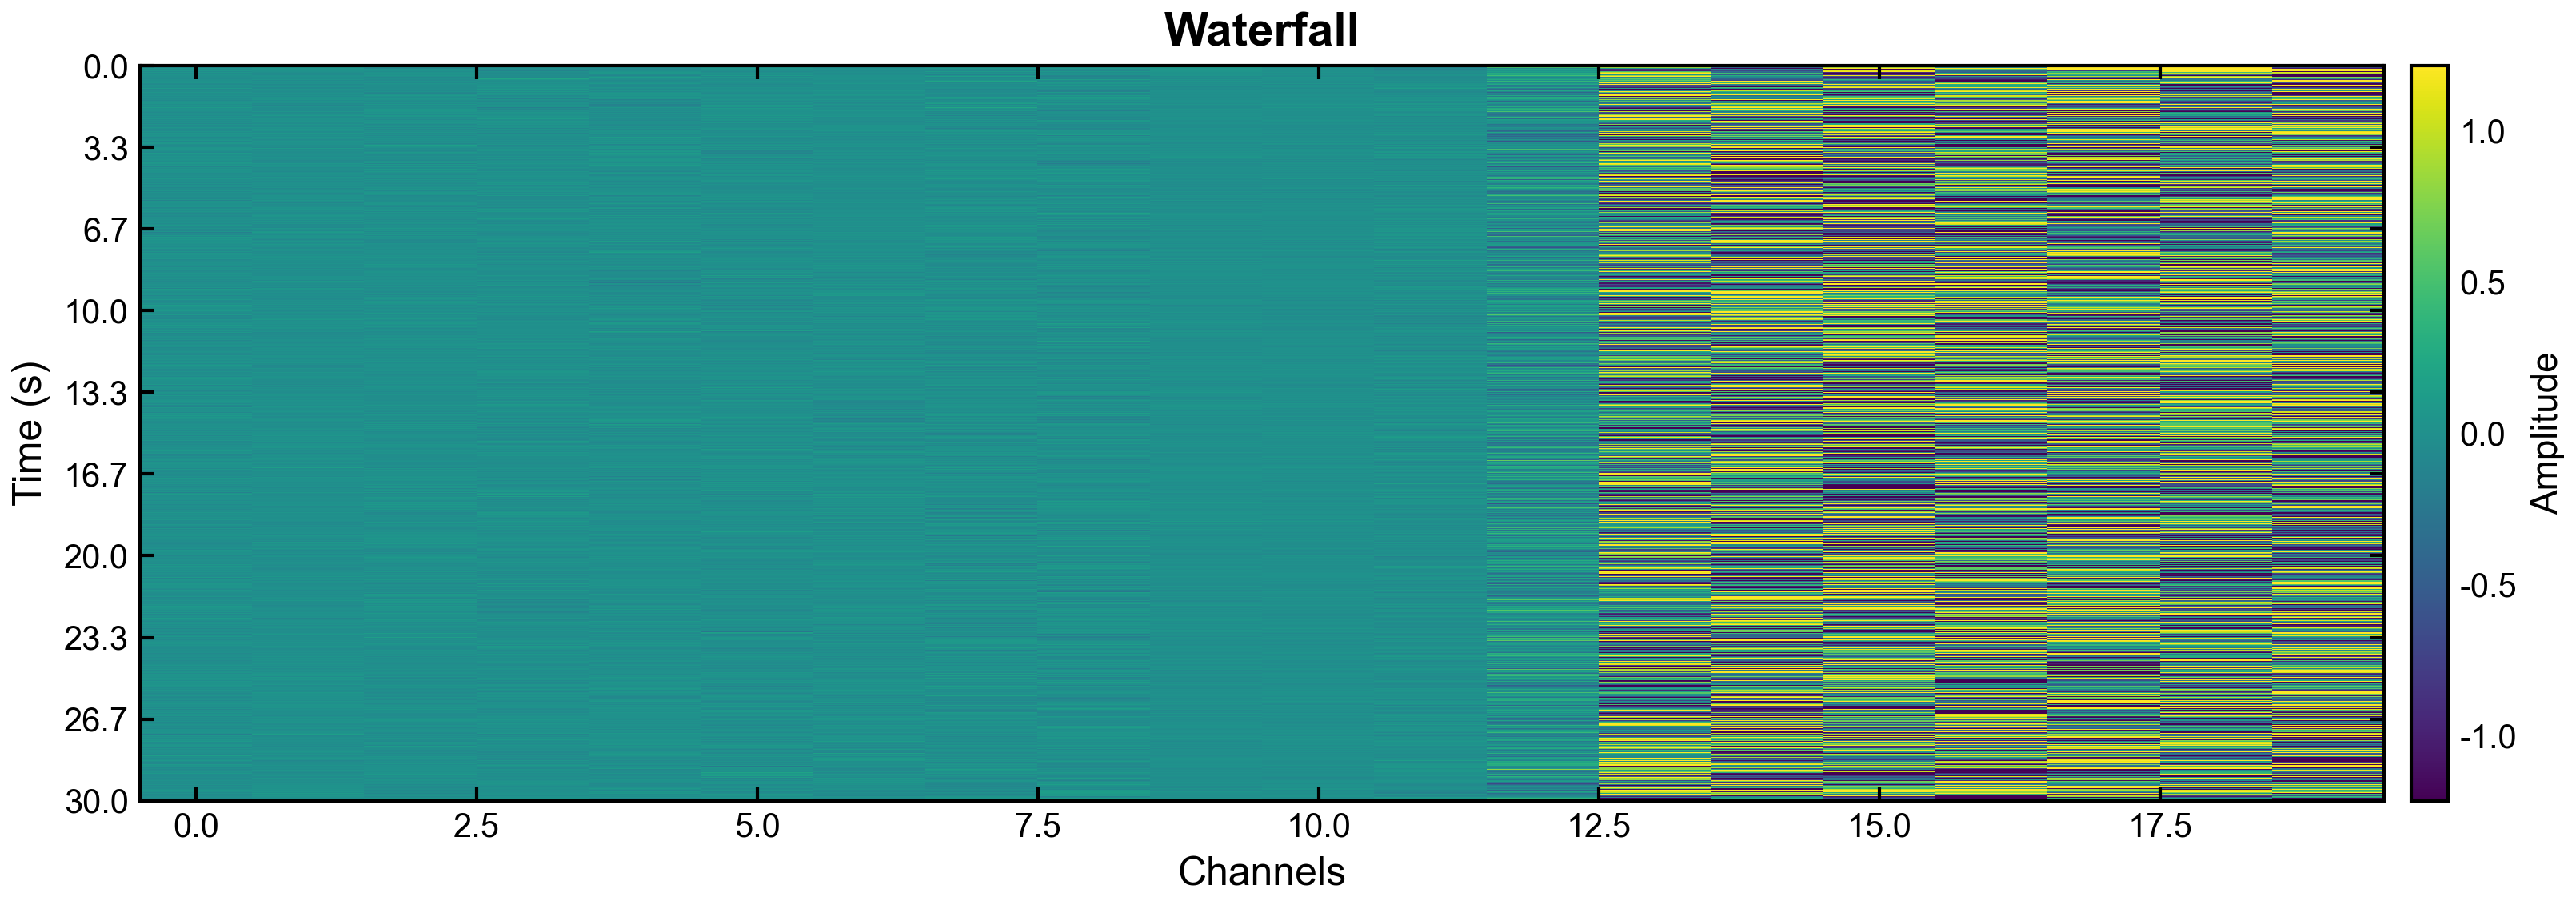

In [7]:
# 对于时频图，直接传入单通道数据而不是整个数据矩阵
Visualizer.WaterfallPlot(
    data=diff_data,
    title="Waterfall",
)